This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?filepath=notebooks%2F/2_knn/)

In [1]:
# Import modules
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Select random seed
random_state = 1

We use scikit-learn to generate a toy 2D data set (two features $x_1$ and $x_2$)  for binary classification  (two classes) 
 - each sample $(x_1,x_2)$ in the dataset is plotted as a 2D point where the two features $x_1$ and $x_2$ are displayed along the abscissa and ordinate axes respectively
 - the corresponding class label $y$ is displayed as a color mark (e.g., yellow or purple)

Text(0, 0.5, '$x_2$')

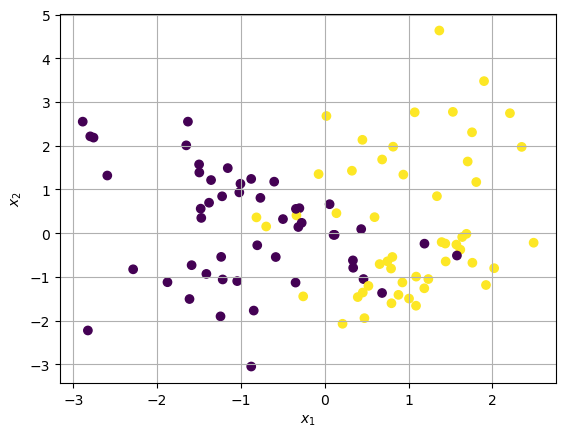

In [10]:
from sklearn.datasets import make_classification
#X are the features (aka inputs, ...), y the labels (aka responses, targets, output...)
X,y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=1000,
                          random_state=random_state, class_sep=1, n_clusters_per_class=2)

from sklearn.model_selection import train_test_split
# We split the initial set in two sets: one, namely the training set, use for training the model, 
# and one, namely the test set, use to compute the validation error
# -> test_size x n_samples for the test set and n_samples x (1- test_size) for the training set
# where test_size is given as a parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state= random_state )
y_train[y_train==0]=-1
y_test[y_test==0]=-1

# Display the training set
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.savefig("2d_binary_classif.pdf")

Then a _k nearest neighbors_ algorithm is used to learn the classification function/rule.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # Creation of the classifier
knn.fit(X_train, y_train) # Model fitting

KNeighborsClassifier()

Text(0, 0.5, '$x_2$')

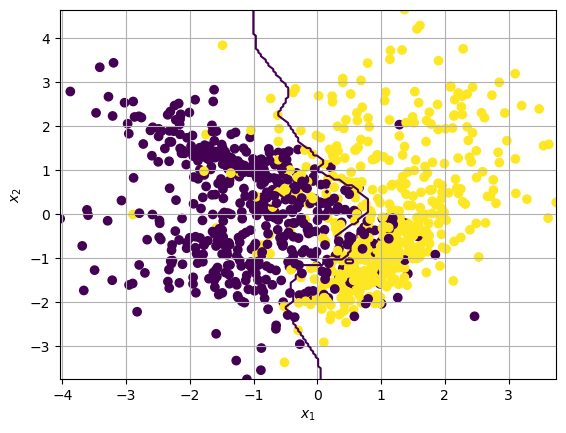

In [5]:
# Plot the decision functions
XX, YY = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(),200),
                     np.linspace(X[:,1].min(), X[:,1].max(),200))
XY = np.vstack([XX.flatten(), YY.flatten()]).T
yp = knn.predict(XY)
plt.contour(XX,YY,yp.reshape(XX.shape),[0])
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid("on")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Model complexity

For the KNN, the number of neighbors considered for the decision is the main hyperparemeter to set-up for small to medium size problem. Default value for scikit-learn is set to 5 (do knn? for help). In the following we are going to plot the overall accuracy function of the hyperparameter.

In [6]:
knn?

Type:        KNeighborsClassifier
String form: KNeighborsClassifier()
File:        ~/miniconda3/envs/newcalc/lib/python3.10/site-packages/sklearn/neighbors/_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algor

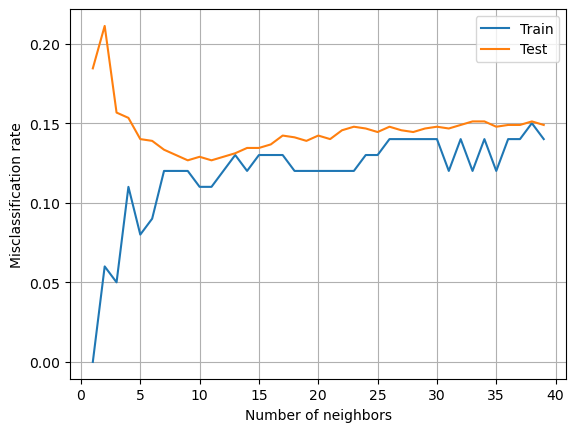

In [7]:
neighbors = np.arange(1,40)
errors_train, errors_validation = [], []
for n_ in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    errors_train.append( np.mean( y_train != y_pred) )
    
    y_pred = knn.predict(X_test)
    errors_validation.append( np.mean( y_test != y_pred) )
    
plt.plot(neighbors,errors_train)
plt.plot(neighbors,errors_validation)
plt.legend(["Train", "Test"])
plt.xlabel("Number of neighbors")
plt.ylabel("Misclassification rate")
plt.grid()

### Exercise

 - In view of the results obtained, which values of the number of neighbors (or range of values) seem optimal? Verify that these values give boudaries that seem coherent to you.
 - In this plot, which edges of the curve correspond to the over and under-fitting cases respectively?
 - Why the train error can not be used alone to select the method (here the value of $k$)?
 
It is possible to make the classification task more difficult by reducing the  `class_sep` parameter (default is 1) in the [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function used to generate the data set. In fact this shrinks the spread between the two classes, which increases the overlapping ratio.
 - What happens when you decrease gradually the `class_sep` parameter from 1 to 0.5  ? In particular, how can you explain the shape of the test error curve? 
 